In [2]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_absolute_error, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
# 加载数据
df = pd.read_csv('https://labfile.oss.aliyuncs.com/courses/1283/weights_heights.csv')
df.head()

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


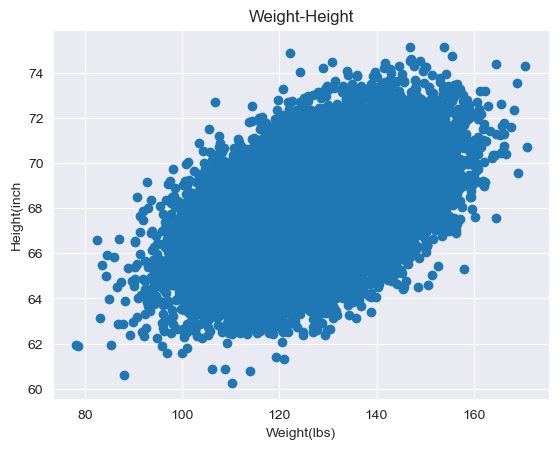

In [9]:
# 绘制二维散点图
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight(lbs)')
plt.ylabel('Height(inch')
plt.title('Weight-Height')
plt.show()

In [24]:
X, y= df['Weight'].values, df['Height'].values
X, y

(array([112.9925, 136.4873, 153.0269, ..., 118.2655, 132.2682, 124.874 ],
       shape=(25000,)),
 array([65.78331, 71.51521, 69.39874, ..., 64.69855, 67.52918, 68.87761],
       shape=(25000,)))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 17)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_test_scaled = scaler.transform(X_test.reshape([-1, 1]))
X_train_scaled.shape, X_test_scaled.shape

((17500, 1), (7500, 1))

## 实现梯度下降的线性回归
### 要求
1. 类名为SGDRegressor, 其继承自sklearn.base.BaseEstimator
2. 构造函数接收学习率(默认为10^-3) 和 n_epochs 全数据迭代次数(默认3)
3. 构造函数创建mse和weight列表, 以便在梯度下降迭代期间追踪均方误差和权重问题
4. 该类需要包含fit和predict方法的训练和预测
5. Fit方法可以接受矩阵x向量和y向量作为参数, 该方法可以自动在x左侧追加一列全为1的值作为截距项系数, 权重W则统一初始化, 然后进行n_epochs权重的更新迭代, 并将每次迭代后的均方误差MSE和权重记录在预先初始化的空列表中
6. fit方法返回SGDRegressor类的当前实例self
7. predict方法接收x矩阵, 同样需要自动在x的左侧追加一列作为截距项系数, 并使用由fit方法得到的权重w计算后返回预测向量

In [74]:
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error

class SGDRegressor(BaseEstimator):
    def __init__(self, eta = 1e-3, n_epochs = 3):
        self.eta = eta
        self.n_epochs = n_epochs
        self.mse_ = []
        self.weights_ = []

    def fit(self, X, y):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        w = np.zeros(X.shape[1])
        for _ in tqdm(range(self.n_epochs)):
            for i in range(X.shape[0]):
                grad = X[i] * (y[i] - w.dot(X[i]))
                w += self.eta * grad
                self.weights_.append(w.copy())
                self.mse_.append(mean_squared_error(y, X.dot(w)))
        self.w_ = self.weights_[np.argmin(self.mse_)]
        return self

    def predict(self, X):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        return X.dot(self.w_)

sdg_reg = SGDRegressor()
sdg_reg.fit(X_train_scaled, y_train)

100%|██████████| 3/3 [00:14<00:00,  4.82s/it]


SGDRegressor()

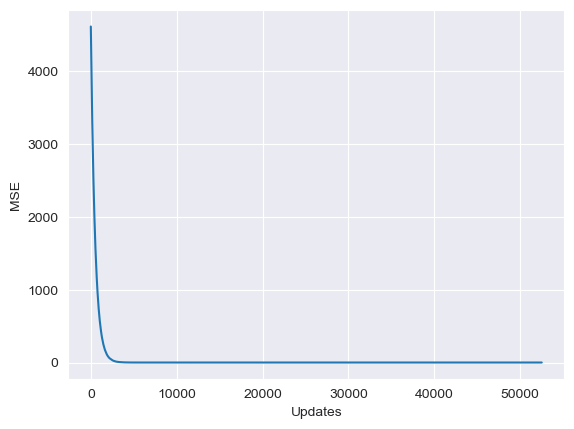

In [77]:
# 输出迭代曲线
plt.plot(range(len(sdg_reg.mse_)), sdg_reg.mse_, label = 'MSE')
plt.xlabel('Updates')
plt.ylabel('MSE')
plt.show()